In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('mushrooms.csv')

In [4]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [6]:
X = df.drop('class', axis = 1)

In [7]:
X = pd.get_dummies(X, drop_first = True)

In [8]:
y = df['class']

In [9]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

In [12]:
from sklearn.ensemble import GradientBoostingClassifier

In [13]:
from sklearn.model_selection import GridSearchCV

In [15]:
param_grid = {'n_estimators':[50, 100], 
             'learning_rate':[0.1,0.05, 0.2],
             'max_depth': [3,4,5]}

In [16]:
gb_model = GradientBoostingClassifier()

In [17]:
grid = GridSearchCV(gb_model, param_grid)

In [18]:
grid.fit(X_train, y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.05, 0.2],
                         'max_depth': [3, 4, 5], 'n_estimators': [50, 100]})

In [19]:
from sklearn.metrics import classification_report, plot_confusion_matrix, accuracy_score

In [20]:
pred = grid.predict(X_test)

In [21]:
pred

array(['p', 'e', 'p', ..., 'p', 'p', 'e'], dtype=object)

In [23]:
grid.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}

In [24]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       655
           p       1.00      1.00      1.00       564

    accuracy                           1.00      1219
   macro avg       1.00      1.00      1.00      1219
weighted avg       1.00      1.00      1.00      1219



In [26]:
# grid.best_estimator_.feature_importances_

In [27]:
feat_import = grid.best_estimator_.feature_importances_

In [28]:
imp_feat = pd.DataFrame(index = X.columns, 
                       data = feat_import,
                       columns = ['Importance'])

In [30]:
imp_feat = imp_feat[imp_feat['Importance']>0.0005]

In [31]:
imp_feat

,Importance
cap-surface_g,0.001049
cap-color_y,0.002311
bruises_t,0.055902
odor_f,0.010443
odor_l,0.018250
odor_n,0.614744
odor_p,0.005611
gill-spacing_w,0.012923
gill-size_n,0.010395
stalk-root_c,0.135970


In [33]:
imp_feat = imp_feat.sort_values('Importance')

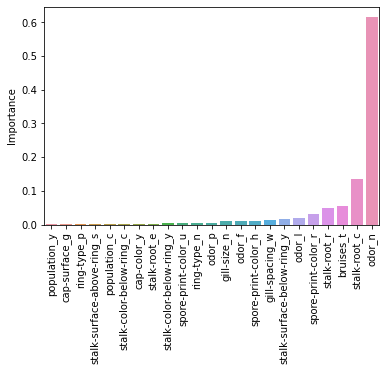

In [36]:
sns.barplot(data = imp_feat,
           x=imp_feat.index,
           y = 'Importance')
plt.xticks(rotation = 90);